INFO:root:Using 6 workers for data loading
INFO:root:Length of labeled train dataset: 200
INFO:root:Length of unlabeled train dataset: 0


ISIC_0000014


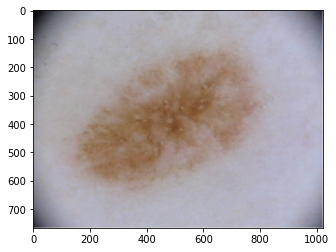

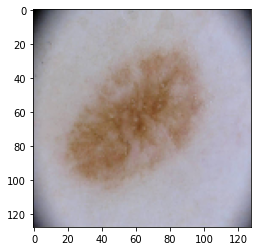

In [8]:
import os
import logging
from pytorch_lightning.utilities.seed import seed_everything

from DLIP.utils.loading.initialize_wandb import initialize_wandb
from DLIP.utils.loading.load_data_module import load_data_module
from DLIP.utils.loading.load_model import load_model
from DLIP.utils.loading.load_transforms import load_transforms
from DLIP.utils.loading.merge_configs import merge_configs
from DLIP.utils.loading.prepare_directory_structure import prepare_directory_structure

from DLIP.utils.loading.split_parameters import split_parameters
from DLIP.utils.cross_validation.cv_trainer import CVTrainer

import matplotlib.pyplot as plt
import numpy as np


logging.basicConfig(level=logging.INFO)

config_files = "/home/ws/sc1357/projects/devel/src/detectron/DLIP/experiments/configurations/base_cfg/cfg_sem_seg_base.yaml"

cfg_yaml = merge_configs(config_files)
experiment_name=cfg_yaml['experiment.name']['value']

config = initialize_wandb(
    cfg_yaml=cfg_yaml,
    experiment_dir=None,
    config_name=None,
    disabled=True
)

#seed_everything(seed=cfg_yaml['experiment.seed']['value'])
parameters_splitted = split_parameters(config, ["model", "train", "data"])

data = load_data_module(parameters_splitted["data"], do_val_init=False)

data.labeled_train_dataset.raw_mode = True

print(data.labeled_train_dataset.indices[0])

plt.imshow(data.labeled_train_dataset[0]["image"])
plt.show()

data.labeled_train_dataset.raw_mode = False

plt.imshow(data.labeled_train_dataset[0]["image"].permute(1,2,0).numpy())
plt.show()